In [ ]:
!pip install tensorflow==2.12.0
!pip install gradio

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import gradio as gr
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
import re
warnings.filterwarnings('ignore')

##### Ingredient Classification 

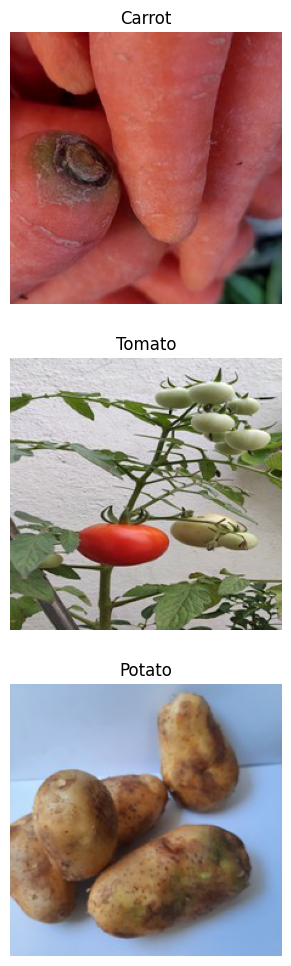

In [ ]:
train_path = "/content/drive/MyDrive/Big/Sample/train"
validation_path = "/content/drive/MyDrive/Big/Sample/validation"
test_path = "/content/drive/MyDrive/Big/Sample/test"

image_categories = os.listdir('/content/drive/MyDrive/Big/Sample/train')

def plot_images(image_categories):
    
    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):
        
        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0
        
        
        # Create Subplot and plot the images
        plt.subplot(3, 1, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()

# Call the function
plot_images(image_categories)

##### Fresh/Rotten Classification

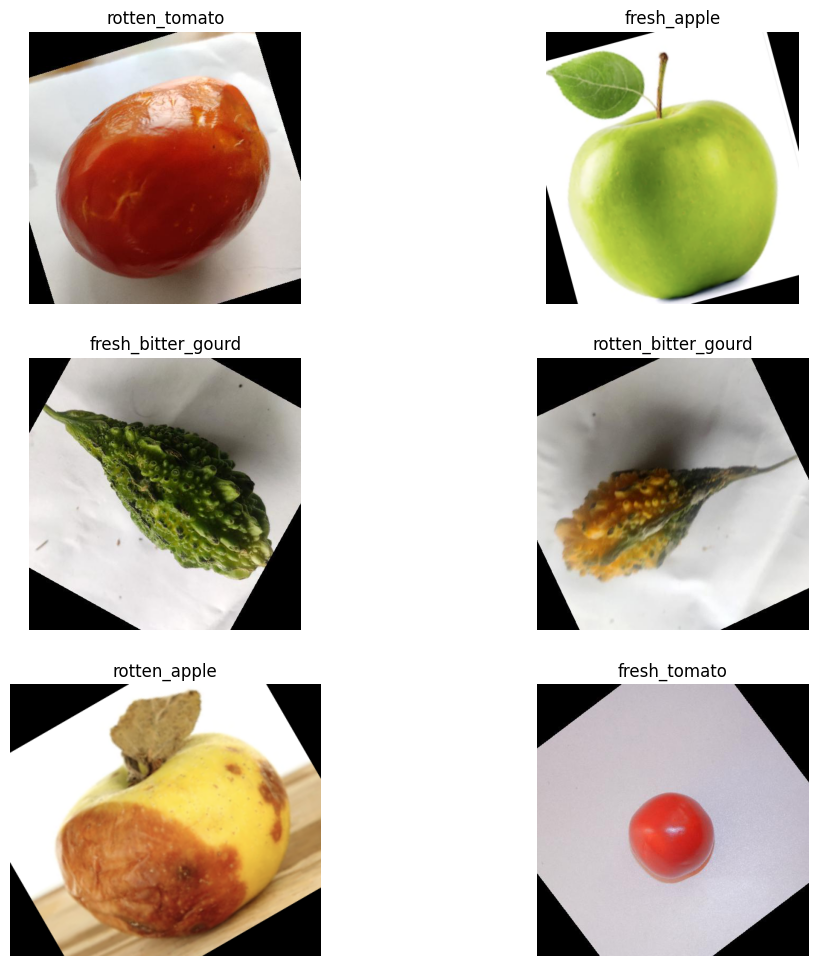

In [ ]:
# Let's plot a few images
train_path_fr = "/content/drive/MyDrive/Big/fresh_rotten/Train"
validation_path_fr = "/content/drive/MyDrive/Big/fresh_rotten/Val"
test_path_fr = "/content/drive/MyDrive/Big/fresh_rotten/Test"

image_categories = os.listdir('/content/drive/MyDrive/Big/fresh_rotten/Train')

def plot_images(image_categories):
    
    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):
        
        # Load images for the ith category
        image_path = train_path_fr + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0
        
        
        # Create Subplot and plot the images
        plt.subplot(3, 2, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()

# Call the function
plot_images(image_categories)

##### Ingredient Classification 

In [ ]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=6,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=6,
                                            class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=6,
                                            class_mode='categorical')

Found 3000 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


##### Fresh/Rotten Classification

In [ ]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator_fr = train_gen.flow_from_directory(
                                            train_path_fr,
                                            target_size=(150, 150),
                                            batch_size=12,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator_fr = train_gen.flow_from_directory(
                                            validation_path_fr,
                                            target_size=(150, 150),
                                            batch_size=12,
                                            class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator_fr = train_gen.flow_from_directory(
                                            test_path_fr,
                                            target_size=(150, 150),
                                            batch_size=12,
                                            class_mode='categorical')

Found 4449 images belonging to 6 classes.
Found 1117 images belonging to 6 classes.
Found 1116 images belonging to 6 classes.


##### Ingredient Classification 

In [ ]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'Carrot', 1: 'Potato', 2: 'Tomato'}


##### Fresh/Rotten Classification

In [ ]:
# Print the class encodings done by the generators
class_map_fr = dict([(v, k) for k, v in train_image_generator_fr.class_indices.items()])
print(class_map_fr)

{0: 'fresh_apple', 1: 'fresh_bitter_gourd', 2: 'fresh_tomato', 3: 'rotten_apple', 4: 'rotten_bitter_gourd', 5: 'rotten_tomato'}


##### Ingredient Classification 

In [ ]:
# Build a custom sequential CNN model

model = Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 87616)             0         
                                                                 
 dense_3 (Dense)             (None, 128)              

##### Fresh/Rotten Classification

In [ ]:
# Build a custom sequential CNN model

model_fr = Sequential() # model object

# Add Layers
model_fr.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model_fr.add(MaxPooling2D(2, ))
model_fr.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model_fr.add(MaxPooling2D(2))

# Flatten the feature map
model_fr.add(Flatten())

# Add the fully connected layers
model_fr.add(Dense(128, activation='relu'))
model_fr.add(Dropout(0.25))
model_fr.add(Dense(128, activation='relu'))
model_fr.add(Dense(6, activation='softmax'))

# print the model summary
model_fr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

##### Ingredient Classification 

In [ ]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator, 
                 epochs=100, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 3000//6, 
                 validation_steps = 300//6, 
                 callbacks=early_stopping)

Epoch 1/100
500/500 [==============================] - 805s 2s/step - loss: 0.4693 - accuracy: 0.8117 - val_loss: 0.1753 - val_accuracy: 0.9500
Epoch 2/100
500/500 [==============================] - 329s 657ms/step - loss: 0.1863 - accuracy: 0.9417 - val_loss: 0.0766 - val_accuracy: 0.9667
Epoch 3/100
500/500 [==============================] - 329s 657ms/step - loss: 0.1430 - accuracy: 0.9590 - val_loss: 0.1616 - val_accuracy: 0.9500
Epoch 4/100
500/500 [==============================] - 308s 616ms/step - loss: 0.0575 - accuracy: 0.9793 - val_loss: 0.0504 - val_accuracy: 0.9900
Epoch 5/100
500/500 [==============================] - 306s 611ms/step - loss: 0.1784 - accuracy: 0.9347 - val_loss: 0.0513 - val_accuracy: 0.9900
Epoch 6/100
500/500 [==============================] - 298s 595ms/step - loss: 0.0828 - accuracy: 0.9733 - val_loss: 0.0315 - val_accuracy: 0.9900
Epoch 7/100
500/500 [==============================] - 308s 615ms/step - loss: 0.0804 - accuracy: 0.9797 - val_loss: 0.02

##### Fresh/Rotten Classification

In [ ]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model_fr.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist_fr = model_fr.fit(train_image_generator_fr, 
                 epochs=100, 
                 verbose=1, 
                 validation_data=val_image_generator_fr, 
                 steps_per_epoch = 4449//12, 
                 validation_steps = 1117//12, 
                 callbacks=early_stopping)

Epoch 1/100
370/370 [==============================] - 1052s 3s/step - loss: 0.6561 - accuracy: 0.7289 - val_loss: 0.3566 - val_accuracy: 0.8504
Epoch 2/100
370/370 [==============================] - 304s 821ms/step - loss: 0.3583 - accuracy: 0.8569 - val_loss: 0.2123 - val_accuracy: 0.8996
Epoch 3/100
370/370 [==============================] - 284s 767ms/step - loss: 0.2819 - accuracy: 0.8824 - val_loss: 0.1883 - val_accuracy: 0.9238
Epoch 4/100
370/370 [==============================] - 297s 804ms/step - loss: 0.2337 - accuracy: 0.8984 - val_loss: 0.1923 - val_accuracy: 0.9229
Epoch 5/100
370/370 [==============================] - 296s 799ms/step - loss: 0.2168 - accuracy: 0.9085 - val_loss: 0.1626 - val_accuracy: 0.9265
Epoch 6/100
370/370 [==============================] - 314s 849ms/step - loss: 0.1914 - accuracy: 0.9254 - val_loss: 0.1784 - val_accuracy: 0.9176
Epoch 7/100
370/370 [==============================] - 324s 875ms/step - loss: 0.1670 - accuracy: 0.9322 - val_loss: 0.1

##### Ingredient Classification 

In [ ]:
model.evaluate(test_image_generator)

93/93 [==============================] - 264s 3s/step - loss: 0.1642 - accuracy: 0.9391


[0.1642387956380844, 0.939068078994751]

##### Fresh/Rotten Classification

In [ ]:
model_fr.evaluate(test_image_generator_fr)

##### Ingredient Classification 

In [ ]:
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

##### Fresh/Rotten Classification

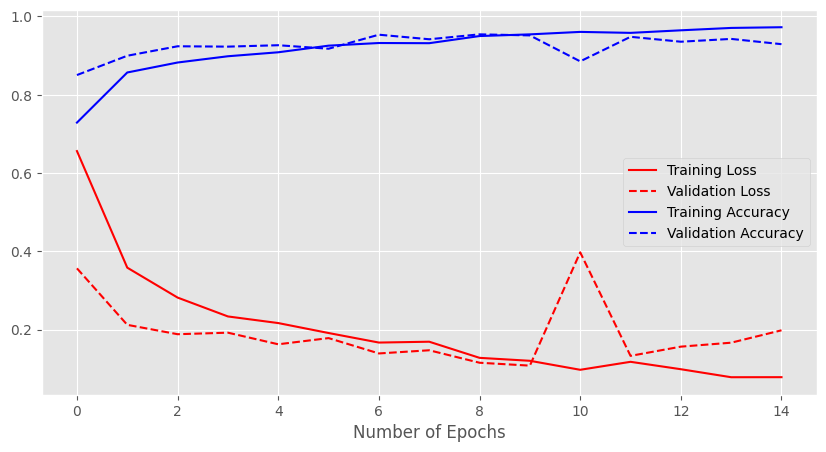

In [ ]:
h = hist_fr.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

##### Fresh/Rotten Classification

1/1 [==============================] - 0s 114ms/step


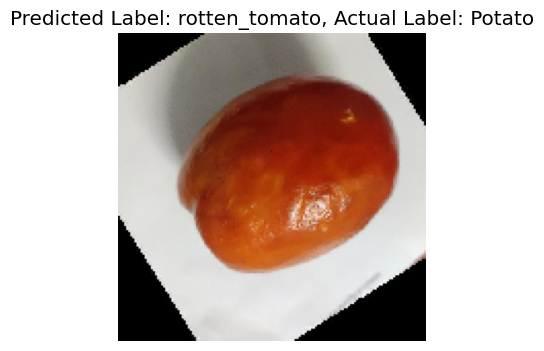

'rotten_tomato'

In [ ]:
# Testing the Model
test_image_path = '/content/drive/MyDrive/Big/fresh_rotten/Test/rotten_tomato/Copy of IMG_20200727_223202.jpg_0_2143.jpg'

def generate_predictions(test_image_path, actual_label, bool=0):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model_fr.predict(test_img_input))
    predicted_vegetable = class_map_fr[predicted_label]
    if bool == 0:
      plt.figure(figsize=(4, 4))
      plt.imshow(test_img_arr)
      plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
      plt.grid()
      plt.axis('off')
      plt.show()

    return predicted_vegetable
    
# call the function
generate_predictions(test_image_path, actual_label='Potato')

##### Ingredient Classification 

1/1 [==============================] - 1s 1s/step


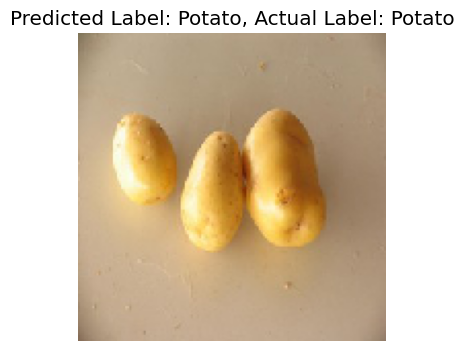

In [ ]:
# Testing the Model
test_image_path = '/content/drive/MyDrive/Big/test/Potato/1003.jpg'

def generate_predictions(test_image_path, actual_label, bool=0):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    if bool == 0:
      plt.figure(figsize=(4, 4))
      plt.imshow(test_img_arr)
      plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
      plt.grid()
      plt.axis('off')
      plt.show()

    if bool == 1:
      return predicted_vegetable

# call the function
generate_predictions(test_image_path, actual_label='Potato')

### Demo

In [ ]:
# The meat list in recipe
meat_types = [
    'ground',
    'chicken',
    'beef',
    'pork',
    'lamb',
    'sausage',
    'steak',
    'ham',
    'bratwurst',
    'bacon',
    'crab',
    'shrimp',
    'cod',
    'fish',
    'tuna',
    'chicken',
    'breast',
    'turkey',
    'chops',
    'lamb',
    'rib',
    'shoulder',
    'loin',
    'tenderloin',
    'veal',
    'salmon',
    'spareribs',
    'bone',
    'chuck',
    'short',
    'ribs',
    'flanken',
    'pork',
    'belly',
    'tenderloins',
    'chicken',
    'wings',
    'chicken',
    'thighs',
    'chicken',
    'legs',
    'duck',
    'quail',
    'game',
    'meat',
    'venison',
    'elk',
    'moose',
    'rabbit',
    'goat',
    'bison',
    'boar',
    'kangaroo',
    'ostrich',
    'emu',
    'horse',
    'snake',
    'turtle',
    'buffalo',
    'crocodile',
    'alligator',
    'frog',
    'escargot',
]

In [ ]:
def classify_image(inp, region, food_type, allergy):
  df = pd.read_csv('/content/drive/MyDrive/Big/recipev1.csv')
  inp = tf.image.resize(inp, [150, 150])

  test_img_arr = inp/255.0
  test_img_input = tf.reshape(test_img_arr, (1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

  predicted_label_fr = np.argmax(model_fr.predict(test_img_input))
  predicted_vegetable_fr = class_map_fr[predicted_label_fr]

  # Check if the ingredient is fresh or not
  if 'fresh' in predicted_vegetable_fr:
    prediction = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[prediction]
    
    df_new = pd.DataFrame()

    df['contains_meat'] = df['ingredient'].apply(lambda ingredient_list: any(meat in ingredient_list for meat in meat_types))

    # Check if the user want to have meat or not
    if food_type == 'High Protein':
      df = df[(df['contains_meat'] == True)]
    elif food_type == 'Vegetarian':
      df = df[(df['contains_meat'] == False)]
    else:
      df = df

    # Check if user have as allergy
    if not allergy:
      for index, row in df.iterrows():
        if predicted_vegetable.lower() in row['ingredient']:
          if region in row['region']:
            temp_df = pd.DataFrame({
                'name': [row['name']],
                'region': [row['region']],
                'ingredient': [row['ingredient']],
                'link': [row['link']]
            })
            df_new = df_new.append(temp_df, ignore_index=True)
    else:
      for index, row in df.iterrows():
        if predicted_vegetable.lower() in row['ingredient']:
          if region in row['region']:
            if allergy not in row['ingredient']:
              temp_df = pd.DataFrame({
                  'name': [row['name']],
                  'region': [row['region']],
                  'ingredient': [row['ingredient']],
                  'link': [row['link']]
              })
              df_new = df_new.append(temp_df, ignore_index=True)

    # Put three recipe in the output
    json = df_new.to_json(orient='values')

    json_data = df_new.to_json(orient='values')
    json_start1 = json_data.find('[[')
    json_end1 = json_data.find('],[', json_start1 + 1)
    json_start2 = json_data.find('],[', json_end1 + 1)
    json_end2 = json_data.find('],[', json_start2 + 1)
    json_start3 = json_data.find('],[', json_end2 + 1)
    json_end3 = json_data.find('],[', json_start3 + 1)  # Updated this line
      
    json1 = json_data[json_start1:json_end1 + 2] if json_start1 != -1 and json_end1 != -1 else "No data"
    json2 = json_data[json_start2:json_end2 + 2] if json_start2 != -1 and json_end2 != -1 else "No data"
    json3 = json_data[json_start3:json_end3] if json_start3 != -1 and json_end3 != -1 else "No data"  # Updated this line


    matches = re.findall(r'"([^"]+)"', json1)

    name = matches[0]
    region = matches[1]
    ingredients = re.sub(r"[\[\]'\"]", "", matches[2])
    link = re.sub(r"\\", "", matches[3])

    output = f"Name: {name}\n\nRegion: {region}\n\nIngredients: {ingredients}\n\nLink: {link}"

    matches2 = re.findall(r'"([^"]+)"', json2)

    name2 = matches2[0]
    region2 = matches2[1]
    ingredients2 = re.sub(r"[\[\]'\"]", "", matches2[2])
    link2 = re.sub(r"\\", "", matches2[3])

    output2 = f"Name: {name2}\n\nRegion: {region2}\n\nIngredients: {ingredients2}\n\nLink: {link2}"


    matches3 = re.findall(r'"([^"]+)"', json3)

    name3 = matches3[0]
    region3 = matches3[1]
    ingredients3 = re.sub(r"[\[\]'\"]", "", matches3[2])
    link3 = re.sub(r"\\", "", matches[3])

    output3 = f"Name: {name3}\n\nRegion: {region3}\n\nIngredients: {ingredients3}\n\nLink: {link3}"
  else:
    return 'This vegetables is stale, please do not eat it.', 'This vegetables is stale, please do not eat it.', 'This vegetables is stale, please do not eat it.'


  return output, output2, output3
  




In [ ]:
gr.Interface(
    fn=classify_image, 
    inputs=[gr.inputs.Image(), 
            gr.inputs.Dropdown(df['region'].unique().tolist()), 
            gr.inputs.Dropdown(['High Protein', 'Vegetarian', 'Normal']),
            'text',
    ],
    outputs=[gr.outputs.Textbox(label="Recipe 1"), gr.outputs.Textbox(label="Recipe 2"), gr.outputs.Textbox(label="Recipe 3")],  # Separate Textbox outputs
    examples=[["/content/drive/MyDrive/Big/test/Potato/1005.jpg"], ["/content/drive/MyDrive/Big/test/Tomato/1152.jpg"], ["/content/drive/MyDrive/Big/fresh_rotten/Test/rotten_tomato/Copy of IMG_20200727_223202.jpg_0_7233.jpg"]]
).launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1595d9219e4f652228.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
